In [1]:
import pandas as pd

### load data

In [3]:
df = pd.read_csv("spam.csv",encoding="latin1")

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df = df.rename(columns={"v1":"label","v2":"text"})[["label","text"]]

In [7]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.shape

(5572, 2)

In [10]:
df.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
df.isna().sum()

label    0
text     0
dtype: int64

In [12]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

<Axes: >

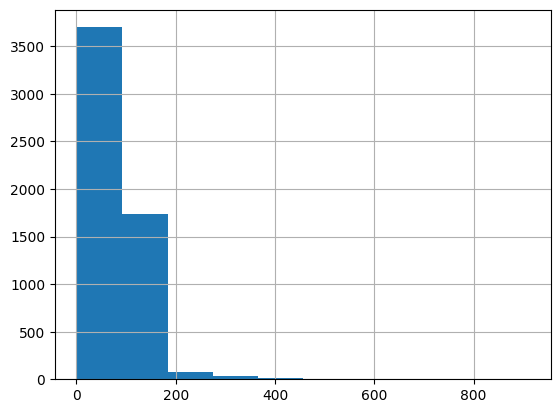

In [13]:
df['text'].str.len().hist()

## Modeling

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import joblib

In [15]:
X = df['text']
y = (df['label'] == "spam").astype(int)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [17]:
pipe = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", LogisticRegression(max_iter=2000))
])

In [24]:
params = {"clf__C":[0.1,1,3], "clf__class_weight":[None,"balanced"]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [25]:
gs = GridSearchCV(pipe, param_grid=params, cv=cv, scoring="f1", n_jobs=-1)
gs.fit(X_train, y_train)

,estimator,Pipeline(step..._iter=2000))])
,param_grid,"{'clf__C': [0.1, 1, ...], 'clf__class_weight': [None, 'balanced']}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,input,'content'


In [26]:
print(gs.best_params_)
print(classification_report(y_test, gs.predict(X_test)))
joblib.dump(gs.best_estimator_, "spam_model.joblib")

{'clf__C': 3, 'clf__class_weight': 'balanced'}
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.95      0.93      0.94       149

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



['spam_model.joblib']

In [28]:
best_model = gs.best_estimator_
joblib.dump(best_model, "spam_model.pkl")

['spam_model.pkl']